In [445]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [446]:
import warnings
warnings.filterwarnings('ignore')

In [447]:
data = pd.read_csv('Decision_trees_1.csv')
data.head()

,Customer ID,Gender,Car Type,Shirt Size,Class
0,1,M,Family,Small,C0
1,2,M,Sports,Medium,C0
2,3,M,Sports,Medium,C0
3,4,M,Sports,Large,C0
4,5,M,Sports,Extra large,C0


In [448]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  20 non-null     int64 
 1   Gender       20 non-null     object
 2   Car Type     20 non-null     object
 3   Shirt Size   20 non-null     object
 4   Class        20 non-null     object
dtypes: int64(1), object(4)
memory usage: 928.0+ bytes


In [449]:
data.describe()

,Customer ID
count,20.00000
mean,10.50000
std,5.91608
min,1.00000
25%,5.75000
50%,10.50000
75%,15.25000
max,20.00000


In [450]:
for y in data.columns:
    if(data[y].dtype == np.float64 or data[y].dtype == np.int64):
          continue
    else:
          data[y] = data[y].str.rstrip()

In [451]:
data['Shirt Size'] = data['Shirt Size'].replace('Extra large','Extra Large')

In [452]:
data.head()

,Customer ID,Gender,Car Type,Shirt Size,Class
0,1,M,Family,Small,C0
1,2,M,Sports,Medium,C0
2,3,M,Sports,Medium,C0
3,4,M,Sports,Large,C0
4,5,M,Sports,Extra Large,C0


In [453]:
# for i in data.columns:
#     if data[f'{i}'].str == True:
#         data[f'{i}'] = data[f'{i}'].str.replace(' ', '')

In [454]:
for i in data.columns:
    print(i,data[f'{i}'].unique())

Customer ID [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Gender ['M' 'F']
Car Type ['Family' 'Sports' 'Luxury']
Shirt Size ['Small' 'Medium' 'Large' 'Extra Large']
Class ['C0' 'C1']


In [455]:
type(data[data.columns[1]][0])

str

In [456]:
data.Gender.unique()

array(['M', 'F'], dtype=object)

In [457]:
le = LabelEncoder()
for i in data.columns:
    print(i)
    data[i] = le.fit_transform(data[i])

Customer ID
Gender
Car Type
Shirt Size
Class


In [458]:
data.head()

,Customer ID,Gender,Car Type,Shirt Size,Class
0,0,1,0,3,0
1,1,1,2,2,0
2,2,1,2,2,0
3,3,1,2,1,0
4,4,1,2,0,0


In [459]:
X = data[['Gender', 'Car Type', 'Shirt Size']]
y = data['Class']

In [460]:
X

,Gender,Car Type,Shirt Size
0,1,0,3
1,1,2,2
2,1,2,2
3,1,2,1
4,1,2,0
5,1,2,0
6,0,2,3
7,0,2,3
8,0,2,2
9,0,1,1


#### Using Decision Tree Classifier with GINI Index

In [461]:
dt_gini_model = DecisionTreeClassifier(criterion='gini',
                                      random_state=100)

In [462]:
dt_gini_model.fit(X,y)

DecisionTreeClassifier(random_state=100)

In [463]:
dt_gini_model.feature_importances_

array([0.21481481, 0.74074074, 0.04444444])

In [464]:
plot_tree(dt_gini_model)

[Text(0.6666666666666666, 0.9, 'x[1] <= 1.5\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.5555555555555556, 0.7, 'x[2] <= 2.5\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.3333333333333333, 0.5, 'x[2] <= 1.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.2222222222222222, 0.3, 'x[0] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.7, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]')]

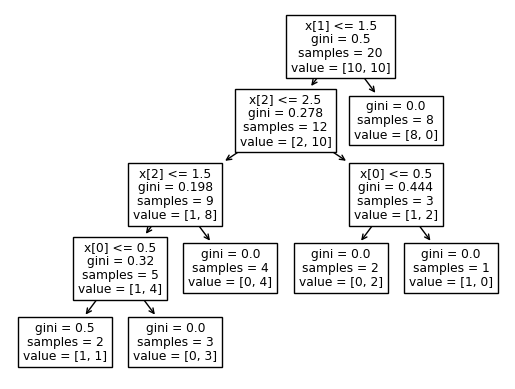

In [465]:
plt.show()

In [466]:
predicted_y = dt_gini_model.predict(X)
dt_gini_model.score(X,y)

0.95

#### Decision Tree using Entropy 

In [467]:
dt_entropy_model = DecisionTreeClassifier(criterion='entropy',
                                       max_depth=None,
                                       min_samples_leaf=1)

In [468]:
dt_entropy_model.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [469]:
dt_entropy_model.n_features_in_

3

In [470]:
plot_tree(dt_entropy_model)

[Text(0.5, 0.9166666666666666, 'x[1] <= 1.5\nentropy = 1.0\nsamples = 20\nvalue = [10, 10]'),
 Text(0.375, 0.75, 'x[2] <= 0.5\nentropy = 0.65\nsamples = 12\nvalue = [2, 10]'),
 Text(0.25, 0.5833333333333334, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.5833333333333334, 'x[2] <= 1.5\nentropy = 0.722\nsamples = 10\nvalue = [2, 8]'),
 Text(0.25, 0.4166666666666667, 'x[1] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.125, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.25, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.75, 0.4166666666666667, 'x[1] <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(0.625, 0.25, 'x[2] <= 2.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.25, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.625, 0.75, 'entropy

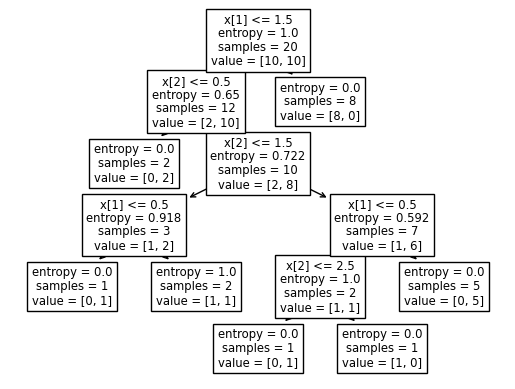

In [471]:
plt.show()

In [472]:
predicted_y = dt_entropy_model.predict(X)
dt_entropy_model.score(X,y)

0.95

#### Decision Tree Regressor 

In [473]:
diabetes_data = pd.read_csv('diabetes_1.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [474]:
diabetes_data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [475]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [476]:
diabetes_data.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [477]:
X = diabetes_data[[
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age'
]]
y = diabetes_data['Outcome']

In [478]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

###### Standardising and Normalising the Training data

In [479]:
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [480]:
decision_tree_gini_model = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=0,
)

In [481]:
decision_tree_gini_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [482]:
decision_tree_gini_model.feature_importances_

array([0.04961129, 0.3162821 , 0.11886775, 0.0339814 , 0.03536461,
       0.19236809, 0.12432797, 0.1291968 ])

In [483]:
plot_tree(decision_tree_gini_model)

[Text(0.41390625, 0.9705882352941176, 'x[1] <= 0.624\ngini = 0.461\nsamples = 614\nvalue = [393, 221]'),
 Text(0.150625, 0.9117647058823529, 'x[7] <= 0.125\ngini = 0.301\nsamples = 352\nvalue = [287, 65]'),
 Text(0.055, 0.8529411764705882, 'x[5] <= 0.461\ngini = 0.162\nsamples = 202\nvalue = [184, 18]'),
 Text(0.03, 0.7941176470588235, 'x[0] <= 0.412\ngini = 0.036\nsamples = 110\nvalue = [108, 2]'),
 Text(0.02, 0.7352941176470589, 'x[6] <= 0.254\ngini = 0.018\nsamples = 109\nvalue = [108, 1]'),
 Text(0.01, 0.6764705882352942, 'gini = 0.0\nsamples = 99\nvalue = [99, 0]'),
 Text(0.03, 0.6764705882352942, 'x[6] <= 0.265\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.02, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04, 0.6176470588235294, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.04, 0.7352941176470589, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08, 0.7941176470588235, 'x[2] <= 0.434\ngini = 0.287\nsamples = 92\nvalue = [76, 16]'),
 Text

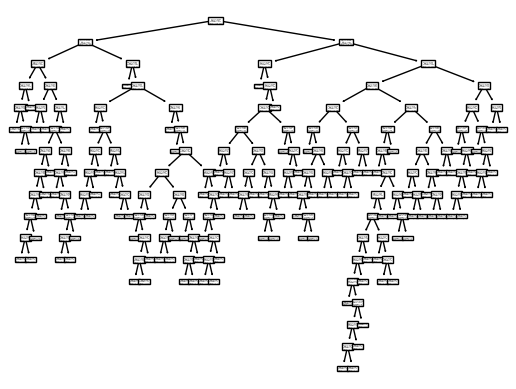

In [484]:
plt.show()

In [485]:
decision_tree_gini_model.score(X_test,y_test)

0.6558441558441559

##### now using entropy as impurity measures

In [486]:
decision_tree_entropy_model = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=0,
)

In [487]:
decision_tree_gini_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [488]:
decision_tree_gini_model.feature_importances_

array([0.04961129, 0.3162821 , 0.11886775, 0.0339814 , 0.03536461,
       0.19236809, 0.12432797, 0.1291968 ])

In [489]:
plot_tree(decision_tree_gini_model)

[Text(0.41390625, 0.9705882352941176, 'x[1] <= 0.624\ngini = 0.461\nsamples = 614\nvalue = [393, 221]'),
 Text(0.150625, 0.9117647058823529, 'x[7] <= 0.125\ngini = 0.301\nsamples = 352\nvalue = [287, 65]'),
 Text(0.055, 0.8529411764705882, 'x[5] <= 0.461\ngini = 0.162\nsamples = 202\nvalue = [184, 18]'),
 Text(0.03, 0.7941176470588235, 'x[0] <= 0.412\ngini = 0.036\nsamples = 110\nvalue = [108, 2]'),
 Text(0.02, 0.7352941176470589, 'x[6] <= 0.254\ngini = 0.018\nsamples = 109\nvalue = [108, 1]'),
 Text(0.01, 0.6764705882352942, 'gini = 0.0\nsamples = 99\nvalue = [99, 0]'),
 Text(0.03, 0.6764705882352942, 'x[6] <= 0.265\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.02, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04, 0.6176470588235294, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.04, 0.7352941176470589, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08, 0.7941176470588235, 'x[2] <= 0.434\ngini = 0.287\nsamples = 92\nvalue = [76, 16]'),
 Text

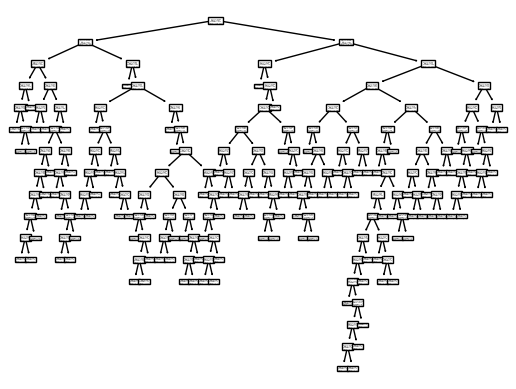

In [490]:
plt.show()

In [491]:
decision_tree_gini_model.score(X_test,y_test)

0.6558441558441559